<a href="https://colab.research.google.com/github/ghadaddd/Parkinson-s-disease-detection/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Travailler avec le deuxième jeu de données

Parmi ces 31 personnes, **23 ont la maladie de Parkinson (PD)**, tandis que **8 sont en bonne santé**.

But du Dataset : Le principal objectif de ce jeu de données est d'identifier les personnes atteintes de la maladie de Parkinson à partir de leurs caractéristiques vocales. Cela revient à une classification binaire où la variable cible (status) est :

0 : la personne est en bonne santé.

1 : la personne est atteinte de la maladie de Parkinson.

y=0 ou y=1


In [ ]:
# travailler sur la première dataset
import pandas as pd
file_path1 = '/content/drive/MyDrive/parkinsons.data'
df1 = pd.read_csv(file_path1)
df1
df1.shape

(195, 24)

In [ ]:
df1.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Exploration des données
1. Vue d'ensemble et statistiques descriptives

2. Valeurs manquantes

3. Distribution des variables (graphiques)

4. Analyse de corrélation

5. Graphiques de comparaison selon le status (malade ou non)

In [ ]:
df1['name'].value_counts()

,count
name,
phon_R01_S01_1,1
phon_R01_S01_2,1
phon_R01_S01_3,1
phon_R01_S01_4,1
phon_R01_S01_5,1
...,...
phon_R01_S50_2,1
phon_R01_S50_3,1
phon_R01_S50_4,1


In [ ]:
# Extraire l'identifiant de la personne (S01, S02, etc.) à partir de la colonne 'name'
df1['person_id'] = df1['name'].str.extract(r'(S\d{2})')  # extrait 'S01', 'S02', etc.
count_per_person = df1['person_id'].value_counts()
# Afficher les résultats
print(count_per_person)


person_id
S21    7
S27    7
S35    7
S01    6
S06    6
S07    6
S04    6
S02    6
S10    6
S13    6
S17    6
S16    6
S18    6
S19    6
S08    6
S05    6
S22    6
S20    6
S25    6
S24    6
S31    6
S32    6
S33    6
S26    6
S34    6
S37    6
S39    6
S42    6
S43    6
S44    6
S49    6
S50    6
Name: count, dtype: int64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df1['status'].unique()

array([1, 0])

In [ ]:
df1['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
print(df1.shape)           # Dimensions
print(df1.dtypes)          # Types de colonnes
print(df1.head())          # Premières lignes
print(df1.describe())      # Statistiques descriptives


(195, 25)
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
person_id            object
dtype: object
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.1

In [ ]:
print(df1.isnull().sum())  # Nombre de valeurs manquantes par colonne

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
person_id           0
dtype: int64


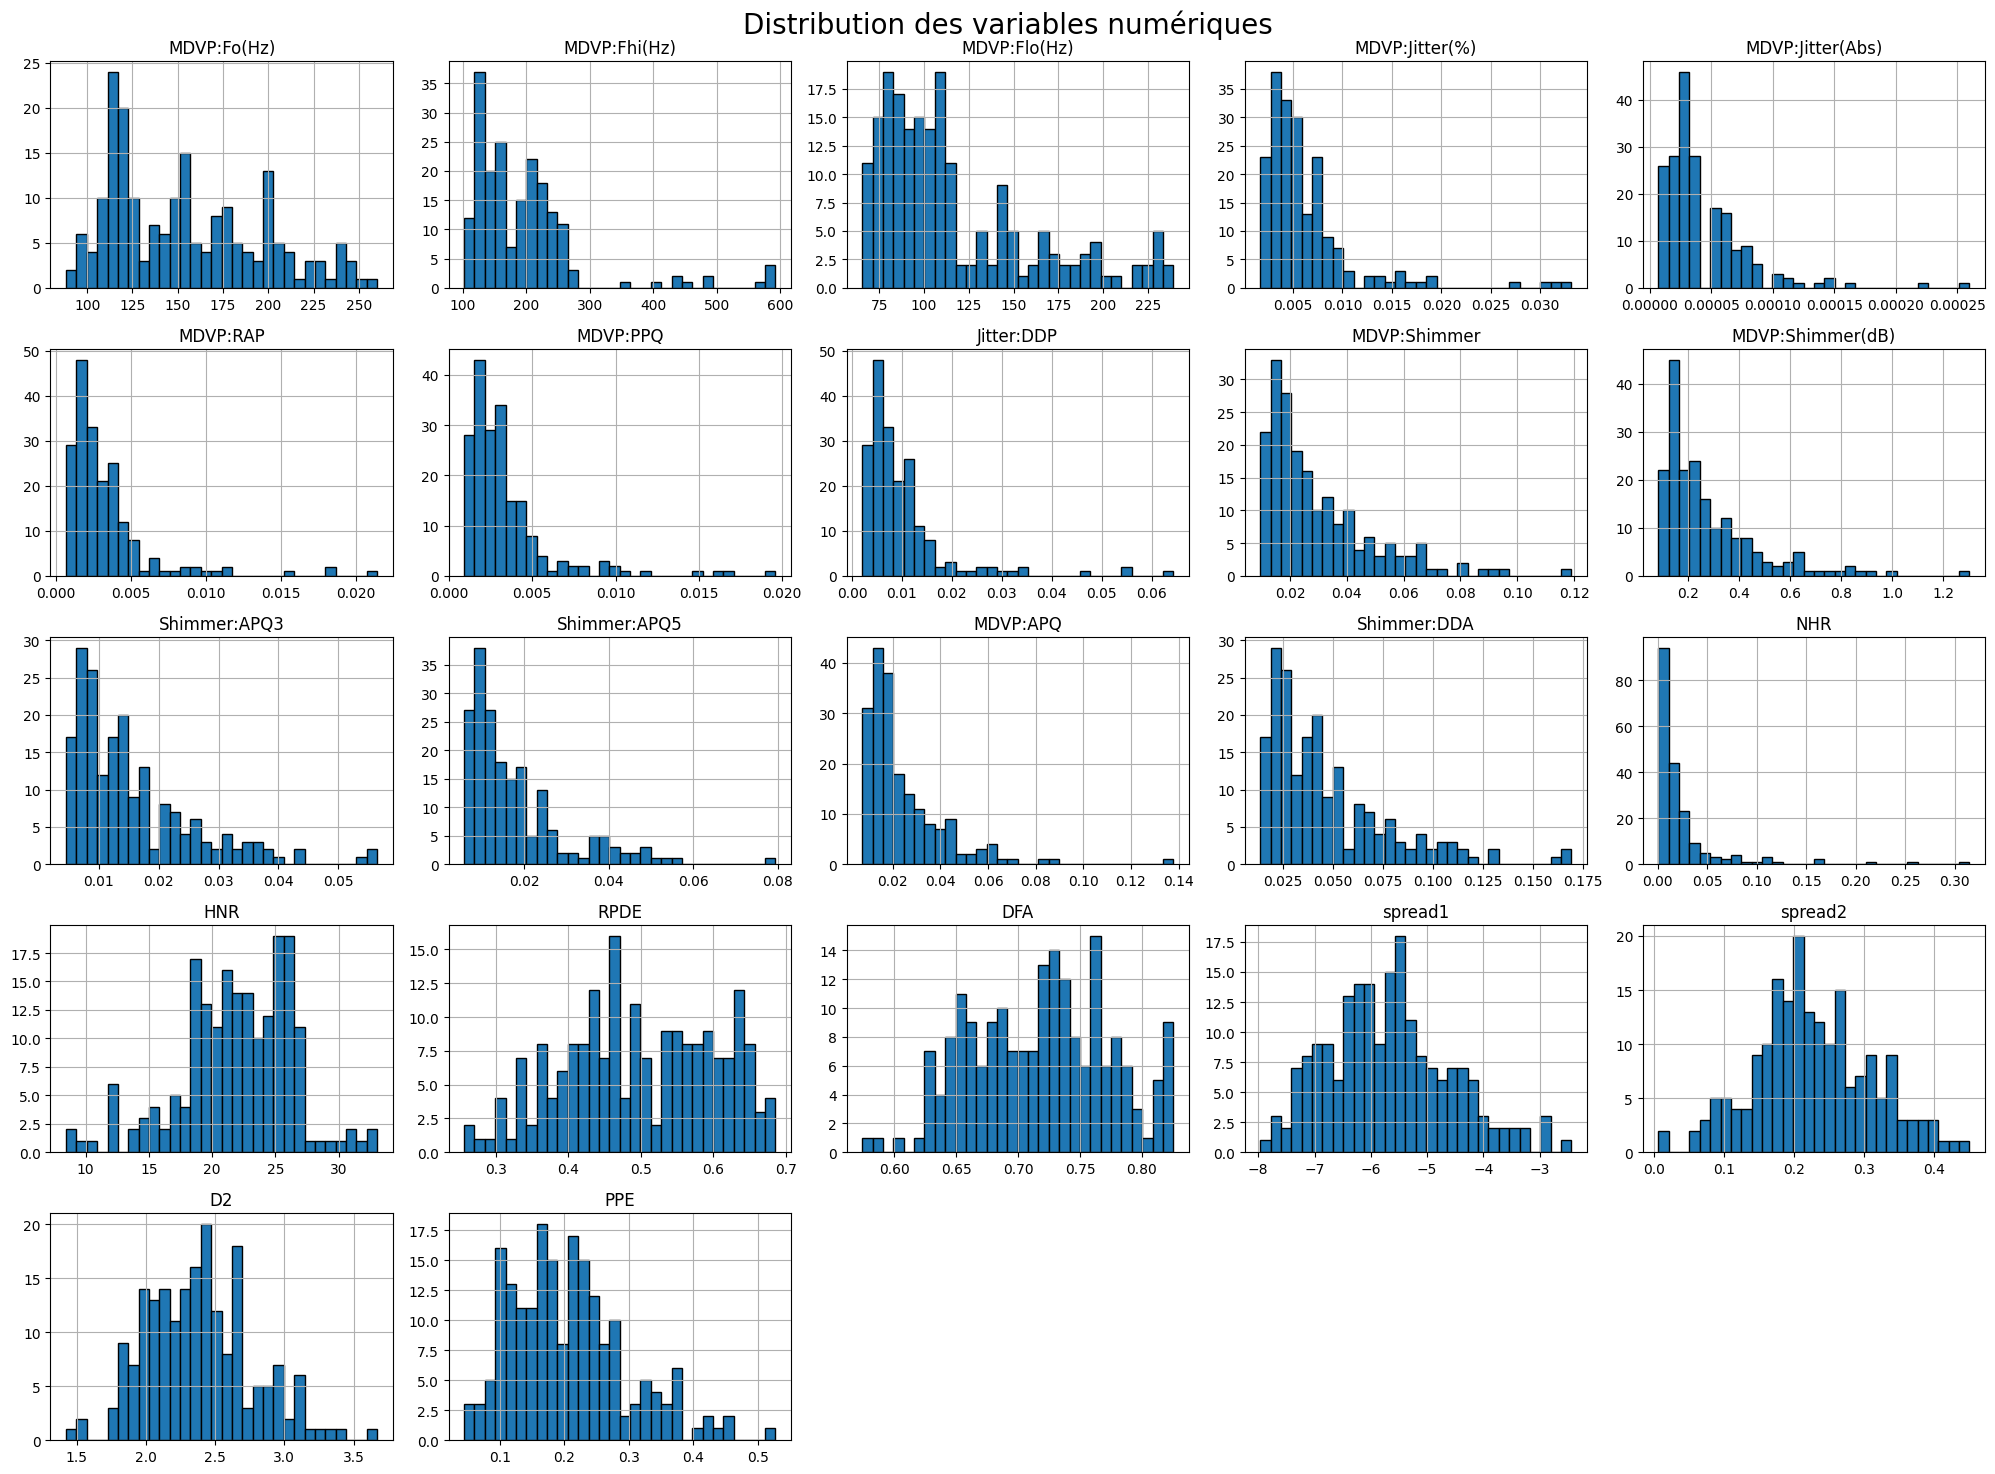

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclure les colonnes non numériques
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.drop('status')

# Histogrammes
df1[numeric_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=20)
plt.tight_layout()
plt.show()


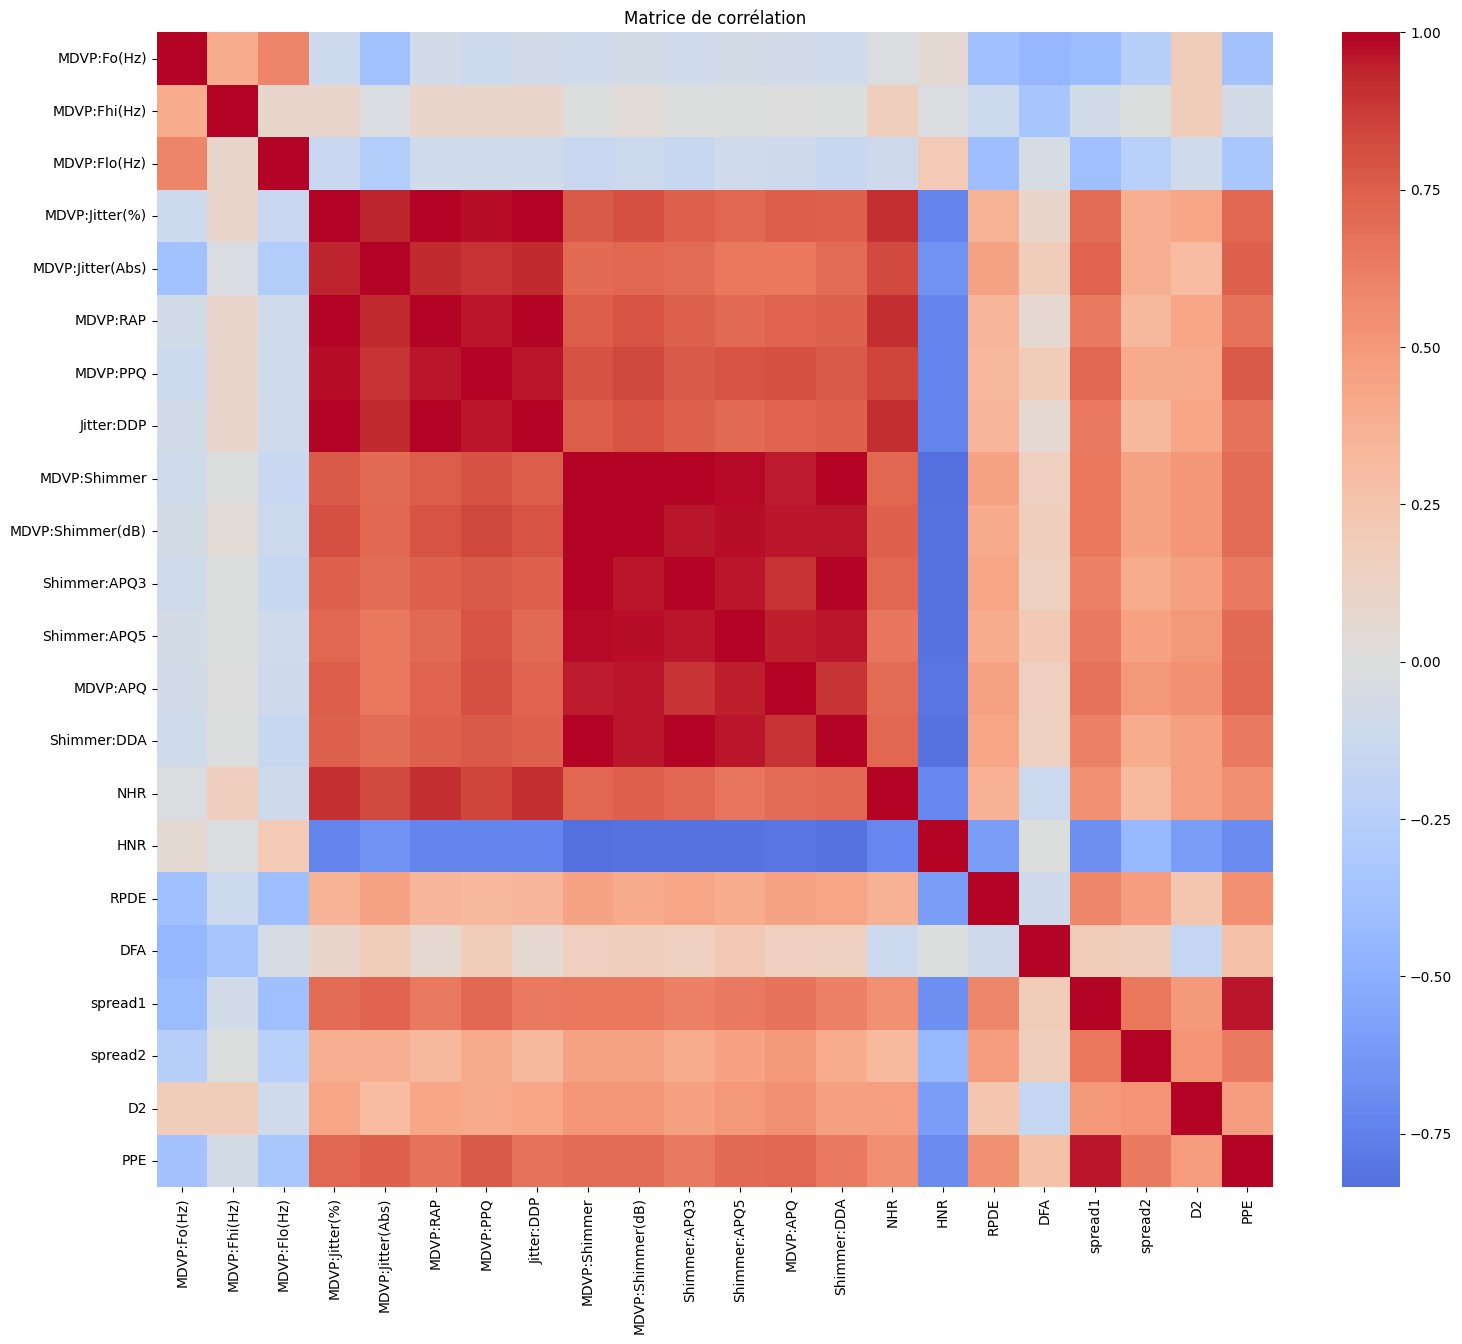

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(df1[numeric_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()


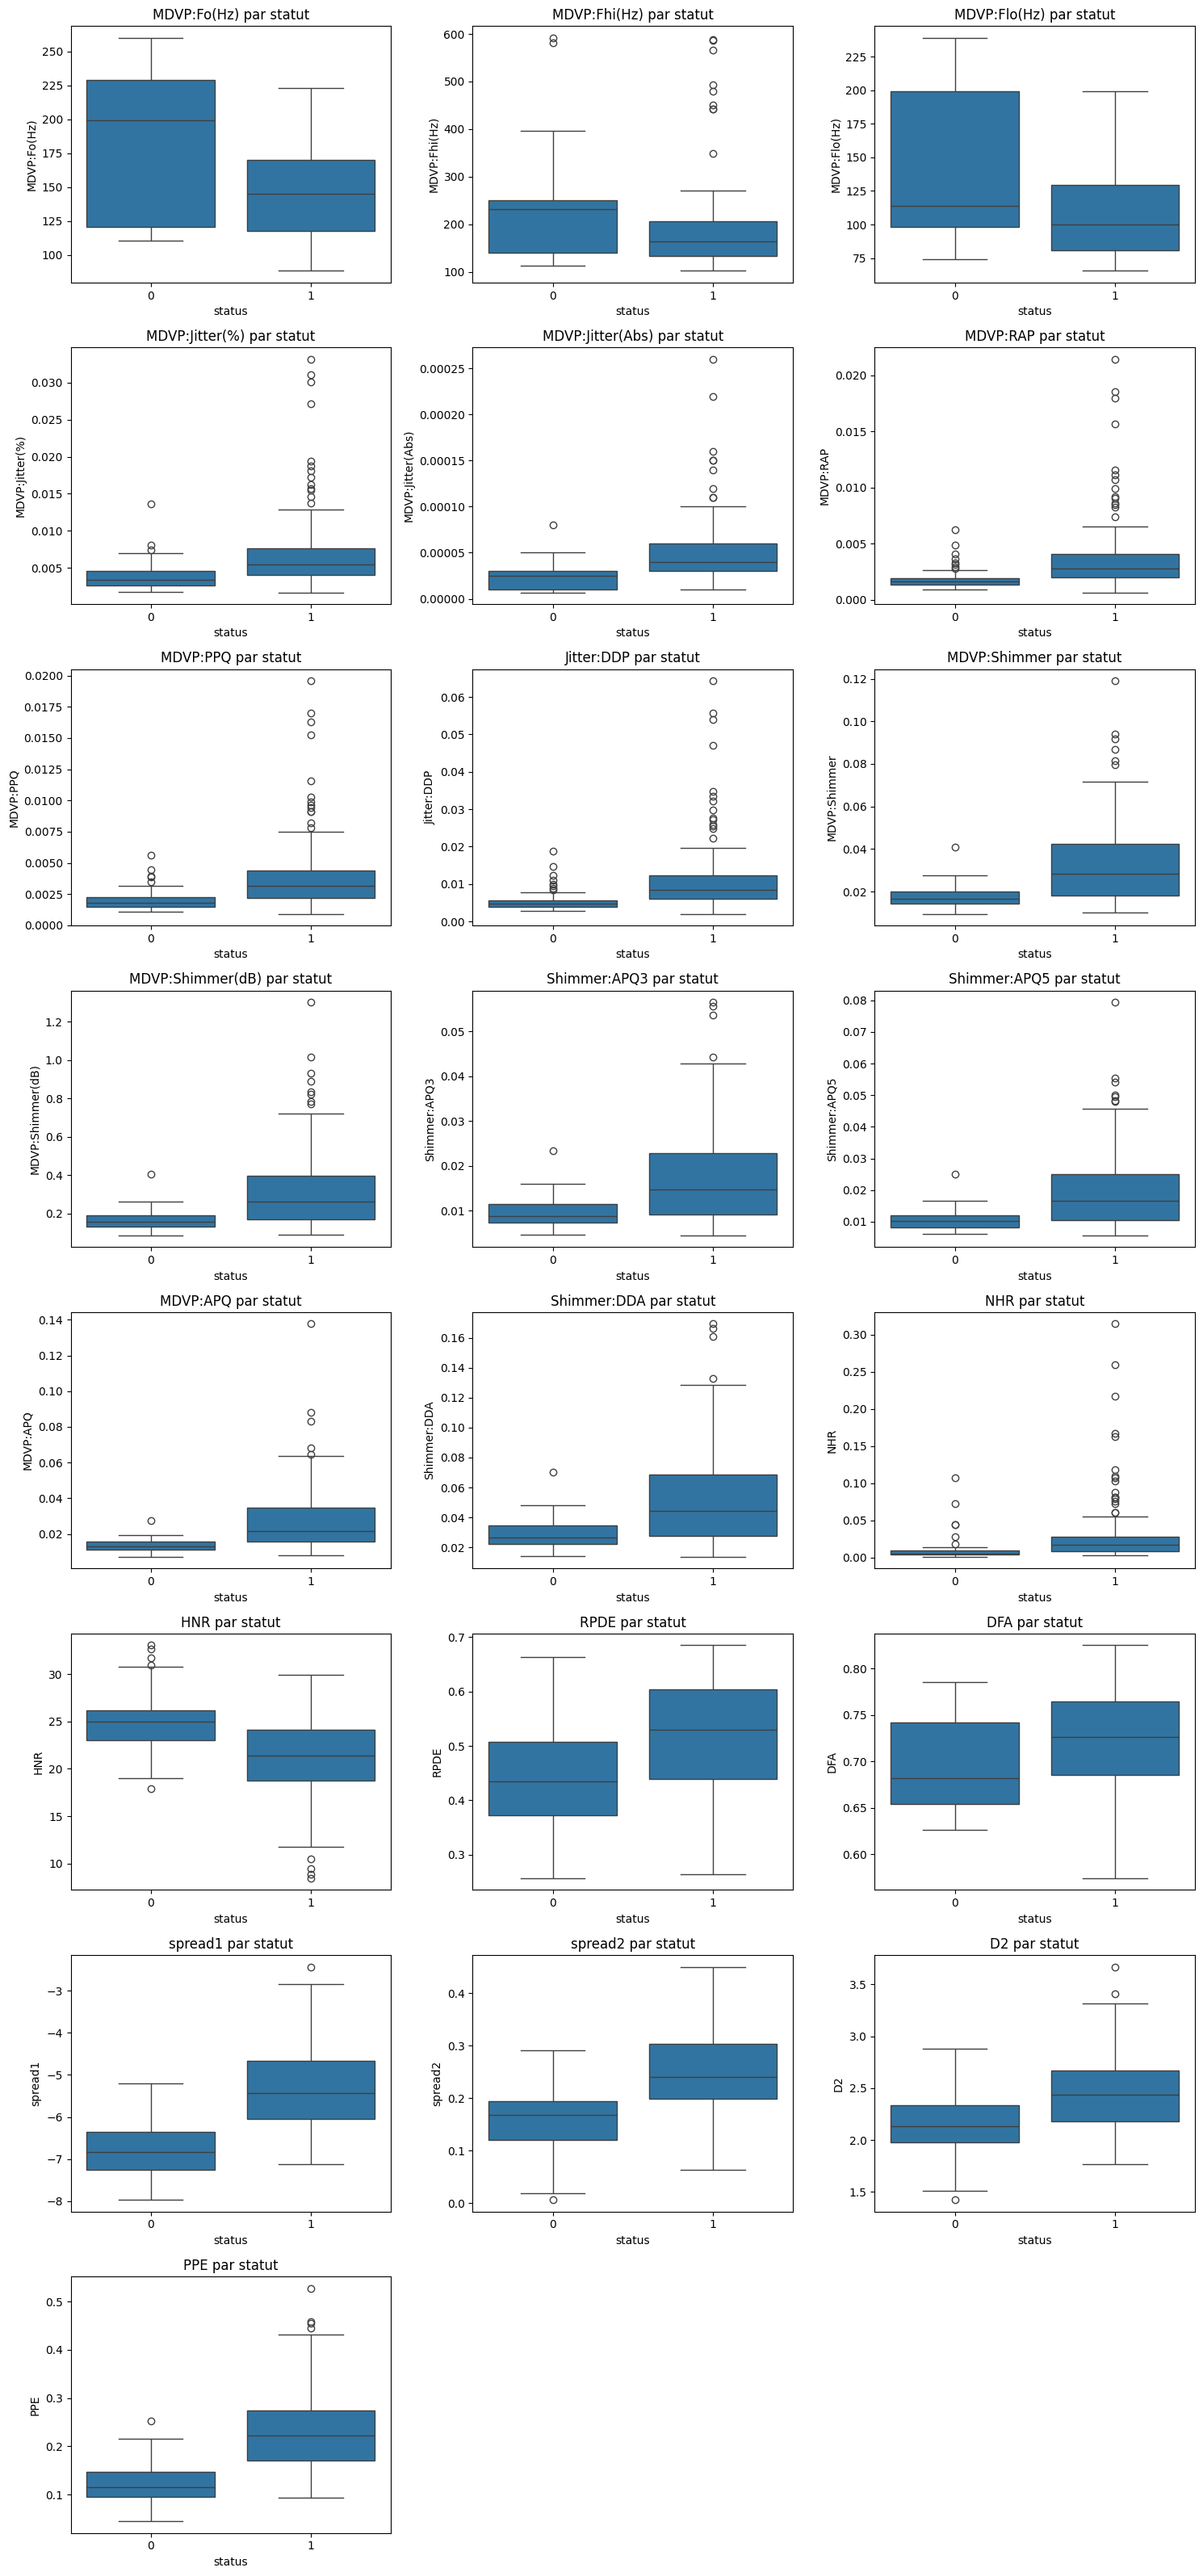

In [ ]:
import math

features_to_plot = numeric_cols
n = len(features_to_plot)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df1, x='status', y=feature)
    plt.title(f"{feature} par statut")

plt.tight_layout()
plt.show()


# Traitement des outliers


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [ ]:
outliers = detect_outliers_iqr(df1, 'MDVP:Jitter(%)')
outliers

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,person_id
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,S24
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,S24
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,S35
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721,S35


In [ ]:
import numpy as np
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR

    # Détection des outliers avant le capping
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Capping
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df, outliers



In [ ]:
# df1, outliers_jitter = cap_outliers_iqr(df1, 'MDVP:Jitter(%)')
# print(f"Nombre d'outliers détectés : {len(outliers_jitter)}")

# df2 = df1.drop(columns=['status'])

# # import numpy as np

# # Capper les outliers pour toutes les colonnes numériques
# for col in df2.select_dtypes(include='number').columns:
#     df2, outliers = cap_outliers_iqr(df2, col)
#     print(f"Nombre d'outliers détectés pour {col} : {len(outliers)}")


# Normalisation des données

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# 1. Séparation des variables features et target
print(df1.head)
X=df1.drop(columns=['name', 'person_id','status'])
# Features (tout sauf 'status')
y = df1['status']  # Target (status)

# 2. Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

<bound method NDFrame.head of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP

(195, 22)

# Training des modèles

In [ ]:





# 3. Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Modélisation avec différents modèles

# a. Régression Logistique
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# b. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# c. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Évaluation des modèles

# a. Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# b. K-Nearest Neighbors
print("K-Nearest Neighbors Evaluation")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# c. Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


from sklearn.linear_model import RidgeClassifier, LogisticRegression

# d. Ridge Classifier
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# e. Lasso (Logistic Regression avec pénalisation L1)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)



# d. Ridge Classifier
print("Ridge Classifier Evaluation")
print(classification_report(y_test, y_pred_ridge))
print(confusion_matrix(y_test, y_pred_ridge))

# e. Lasso (Logistic Regression L1)
print("Lasso (L1) Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_lasso))
print(confusion_matrix(y_test, y_pred_lasso))

Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59

[[ 9  6]
 [ 2 42]]
K-Nearest Neighbors Evaluation
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]
Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   

In [ ]:
from xgboost import XGBClassifier

# f. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# f. XGBoost Evaluation
print("XGBoost Classifier Evaluation")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier Evaluation
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59

[[11  4]
 [ 0 44]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Résumé des modèles testés


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionnaire pour stocker les résultats
results_train = {}
results_test = {}

# Liste des modèles et de leurs prédictions
model_predictions_train = {
    "Logistic Regression": log_reg.predict(X_train),
    "K-Nearest Neighbors": knn.predict(X_train),
    "Random Forest": rf.predict(X_train),
    "Ridge Classifier": ridge.predict(X_train),
    "Lasso Logistic Regression": lasso.predict(X_train),
    "XGBoost Classifier": xgb.predict(X_train),
}

model_predictions_test = {
    "Logistic Regression": y_pred_log_reg,
    "K-Nearest Neighbors": y_pred_knn,
    "Random Forest": y_pred_rf,
    "Ridge Classifier": y_pred_ridge,
    "Lasso Logistic Regression": y_pred_lasso,
    "XGBoost Classifier": y_pred_xgb,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test.keys():
    # Évaluation sur données d'entraînement
    y_pred_train = model_predictions_train[model_name]
    results_train[model_name] = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision (1)": precision_score(y_train, y_pred_train, pos_label=1),
        "Recall (1)": recall_score(y_train, y_pred_train, pos_label=1),
        "F1-score (1)": f1_score(y_train, y_pred_train, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test = model_predictions_test[model_name]
    results_test[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision (1)": precision_score(y_test, y_pred_test, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test, pos_label=1),
    }

# Convertir en DataFrames
df_train = pd.DataFrame(results_train).T.round(3)
df_test = pd.DataFrame(results_test).T.round(3)

# Affichage
print("\n📊 Performances sur les données d'entraînement :\n")
print(df_train)

print("\n📈 Performances sur les données de test :\n")
print(df_test)



📊 Performances sur les données d'entraînement :

                           Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression           0.882          0.892       0.961         0.925
K-Nearest Neighbors           0.956          0.980       0.961         0.971
Random Forest                 1.000          1.000       1.000         1.000
Ridge Classifier              0.904          0.895       0.990         0.940
Lasso Logistic Regression     0.875          0.891       0.951         0.920
XGBoost Classifier            1.000          1.000       1.000         1.000

📈 Performances sur les données de test :

                           Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression           0.864          0.875       0.955         0.913
K-Nearest Neighbors           0.898          0.896       0.977         0.935
Random Forest                 0.932          0.935       0.977         0.956
Ridge Classifier              0.898          0.880       1.0

# Grid search pour les différents modèles


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle
rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                       scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_rf.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("✅ Best parameters for Random Forest:")
print(grid_rf.best_params_)


best_rf_model = grid_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
y_train_pred_rf_best = best_rf_model.predict(X_train)

print("📊 Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_rf_best))
print(confusion_matrix(y_test, y_pred_rf_best))

# print("\n📊 Évaluation sur les données d'entraînement (overfitting check) :")
# print(classification_report(y_train, y_train_pred_rf_best))
# print(confusion_matrix(y_train, y_train_pred_rf_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
📊 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59

[[12  3]
 [ 0 44]]


In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialiser le modèle
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                        scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_xgb.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("✅ Best parameters for XGBoost:")
print(grid_xgb.best_params_)
best_xgb_model = grid_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)
y_pred_xgb_best = best_xgb_model.predict(X_test)
y_train_pred_xgb_best = best_xgb_model.predict(X_train)
print("\n📊 Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_xgb_best))
print(confusion_matrix(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best parameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

📊 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59

[[12  3]
 [ 0 44]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
      'metric': ['minkowski'],
      'p': [1, 2, 3, 4, 5]
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("✅ Best parameters for K-Nearest Neighbors:")
print(grid_knn.best_params_)
best_knn_model = grid_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
y_train_pred_knn_best = best_knn_model.predict(X_train)
print(classification_report(y_test, y_pred_knn_best))
print(confusion_matrix(y_test, y_pred_knn_best))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best parameters for K-Nearest Neighbors:
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

[[13  2]
 [ 0 44]]


In [ ]:
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1']
}

lasso = LogisticRegression(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

print("✅ Best parameters for Lasso Logistic Regression:")
print(grid_lasso.best_params_)

best_lasso_model = grid_lasso.best_estimator_
best_lasso_model.fit(X_train, y_train)
y_pred_lasso_best = best_lasso_model.predict(X_test)
y_train_pred_lasso_best = best_lasso_model.predict(X_train)
print(classification_report(y_test, y_pred_lasso_best))
print(confusion_matrix(y_test, y_pred_lasso_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best parameters for Lasso Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59

[[ 8  7]
 [ 1 43]]


In [ ]:
from sklearn.linear_model import RidgeClassifier

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge = RidgeClassifier()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

print("✅ Best parameters for Ridge Classifier:")
print(grid_ridge.best_params_)
best_ridge_model = grid_ridge.best_estimator_
best_ridge_model.fit(X_train, y_train)
y_pred_ridge_best = best_ridge_model.predict(X_test)
y_train_pred_ridge_best = best_ridge_model.predict(X_train)
print(classification_report(y_test, y_pred_ridge_best))
print(confusion_matrix(y_test, y_pred_ridge_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best parameters for Ridge Classifier:
{'alpha': 10.0}
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59

[[ 8  7]
 [ 0 44]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # C est l'inverse de la régularisation
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_reg = LogisticRegression(max_iter=10000)
grid_logreg = GridSearchCV(log_reg, param_grid_logreg, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("✅ Best parameters for Logistic Regression:")
print(grid_logreg.best_params_)
best_logreg_model = grid_logreg.best_estimator_
best_logreg_model.fit(X_train, y_train)
y_pred_logreg_best = best_logreg_model.predict(X_test)
y_train_pred_logreg_best = best_logreg_model.predict(X_train)
print(classification_report(y_test, y_pred_logreg_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
# il se base sur l'hypothèse que les features sont indépendants
# Initialisation et entraînement
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prédiction
y_pred_gnb = gnb.predict(X_test)

# Évaluation
print("Gaussian Naive Bayes Evaluation")
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))


Gaussian Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.82        44

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59

[[12  3]
 [11 33]]


- 0 for healthy   -> non malade
- 1 for PD        -> malade



In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Charger le dataframe (df1) si ce n'est pas déjà fait
# df1 = pd.read_csv('path_to_file.csv')  # À décommenter si nécessaire

# 1. Prétraitement des données

# Supprimer la colonne 'name' (identifiant)
# df1 = df1.drop(columns=['name'])

# Vérifier si la colonne 'status' est déjà binaire (0 ou 1)
# Si ce n'est pas le cas, nous devons l'encoder correctement (par exemple, malade = 1, sain = 0)
# Ici, on suppose que 'status' est déjà binaire.

# Séparation des variables features et target
X = df1.drop(columns=['status'])  # Features (tout sauf 'status')
y = df1['status']  # Target (status)

# 2. Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



ValueError: could not convert string to float: 'phon_R01_S01_1'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Supposons que df1 soit ton DataFrame initial
# 1. Retirer les colonnes 'name' et 'status'
df_features = df1.drop(columns=['name', 'status'])

# 2. Calculer la matrice de corrélation avant la standardisation
corr_matrix_before = df_features.corr()

# Afficher la matrice de corrélation avant la standardisation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation - Avant Standardisation")
plt.show()

# 3. Appliquer la standardisation (centrage et réduction) sur les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Convertir les données standardisées en DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns)

# 4. Calculer la matrice de corrélation après la standardisation
corr_matrix_after = df_scaled.corr()

# Afficher la matrice de corrélation après la standardisation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation - Après Standardisation")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Charger les deux jeux de données
# df1 = pd.read_csv('dataset_voix.csv')  # Exemple pour charger le premier jeu de données
# df2 = pd.read_csv('dataset_clinique.csv')  # Exemple pour charger le second jeu de données

# Assurer que les deux jeux de données sont compatibles (basé sur les identifiants des patients, par exemple 'name' ou 'subject#')
# Si nécessaire, fusionner les deux jeux de données
df_combined = pd.merge(df, df1, on="subject#")

# Suppression des colonnes inutiles (par exemple 'name' et autres identifiants)
df_combined = df_combined.drop(columns=['name', 'subject#'])

# Séparation des variables features et de la cible
X = df_combined.drop(columns=['status'])  # Tout sauf la colonne 'status'
y = df_combined['status']  # La variable cible 'status' (1 = malade, 0 = sain)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraînement de différents modèles

# 1. Régression Logistique
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Évaluation des modèles

# a. Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# b. K-Nearest Neighbors
print("K-Nearest Neighbors Evaluation")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# c. Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
